In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Debug
# %matplotlib notebook
# pd.options.display.max_rows = 200

In [17]:
df = pd.read_csv("depth-map-data/2-wall-corner/1503619131430261850-cloudpoint.csv", 
                 names = ['x', 'y', 'z', 'intensity', 'ring', 'rotation', 'revolution'])
df['distance'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# Debug
# df.describe()

In [18]:
df.sort_values(['rotation', 'ring'], inplace = True)
df_arr = df.as_matrix()

# Debug
# df.head(200)
# df['rotation'].value_counts().sort_index()
# df['revolution'].value_counts().sort_index()

In [19]:
width = 2088
height = 64

img = np.zeros((width, height))

for i in range(width):
    df_rot_slice = df.iloc[height * i : height * (i + 1)].copy()
    df_rot_slice_arr = df_rot_slice['distance'].as_matrix()
    img[i] = df_rot_slice_arr
    
img = np.rot90(img)

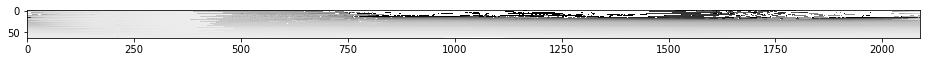

In [22]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.imshow(img, cmap='binary', vmax=50)

fig.savefig('depth-map.png', dpi = 300)